In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.dates import DateFormatter
import numpy as np
import calmap

In [43]:
df_comments = pd.read_csv("./reddit_res/reddit_sentiment_comment_geriberta.csv")
df_posts = pd.read_csv("./reddit_res/reddit_sentiment_post_geriberta.csv")
df_comments

,Unnamed: 0,text,created,Sentiment,Scores
0,0,denke deshalb gerne rausfinden falsch mache,2023-05-23 10:04:18,Neutral,"[[0.0223, 0.9458, 0.0319]]"
1,1,wenns außer funktioniert wirds wohl liegen,2023-05-22 20:43:03,Neutral,"[[0.0174, 0.9617, 0.0209]]"
2,2,theoretisch trotzdem immer zahlen zoll wohl an...,2023-05-22 19:59:01,Positive,"[[0.0023, 0.0112, 0.9864]]"
3,3,interessant irgendwas mach eindeutig falsch,2023-05-23 10:12:58,Neutral,"[[0.0017, 0.9982, 0.0]]"
4,4,letzte aliexpress-sendung absender rotterdam g...,2023-05-22 11:38:57,Positive,"[[0.0005, 0.0016, 0.9979]]"
...,...,...,...,...,...
7424,7695,besitze auto mehr seit ca 10 jahren mache flug...,2023-05-09 17:58:22,Positive,"[[0.0017, 0.006, 0.9923]]"
7425,7696,nö warum solange politik meint kohle hochzufah...,2023-05-09 21:04:45,Neutral,"[[0.0042, 0.9926, 0.0032]]"
7426,7697,nö eigenen geldbeutel hilft niemand schenkt ge...,2023-05-10 17:59:33,Neutral,"[[0.0017, 0.9982, 0.0001]]"
7427,7698,gar brauche auto beruflich fliegen,2023-05-11 02:41:18,Positive,"[[0.0015, 0.0051, 0.9934]]"


In [44]:
df_comments["negativeSentimentScore"] = df_comments["Scores"].map(lambda x: eval(x)[0][0])
df_comments["neutralSentimentScore"] = df_comments["Scores"].map(lambda x: eval(x)[0][1])
df_comments["positiveSentimentScore"] = df_comments["Scores"].map(lambda x: eval(x)[0][2])
df_comments

,Unnamed: 0,text,created,Sentiment,Scores,negativeSentimentScore,neutralSentimentScore,positiveSentimentScore
0,0,denke deshalb gerne rausfinden falsch mache,2023-05-23 10:04:18,Neutral,"[[0.0223, 0.9458, 0.0319]]",0.0223,0.9458,0.0319
1,1,wenns außer funktioniert wirds wohl liegen,2023-05-22 20:43:03,Neutral,"[[0.0174, 0.9617, 0.0209]]",0.0174,0.9617,0.0209
2,2,theoretisch trotzdem immer zahlen zoll wohl an...,2023-05-22 19:59:01,Positive,"[[0.0023, 0.0112, 0.9864]]",0.0023,0.0112,0.9864
3,3,interessant irgendwas mach eindeutig falsch,2023-05-23 10:12:58,Neutral,"[[0.0017, 0.9982, 0.0]]",0.0017,0.9982,0.0000
4,4,letzte aliexpress-sendung absender rotterdam g...,2023-05-22 11:38:57,Positive,"[[0.0005, 0.0016, 0.9979]]",0.0005,0.0016,0.9979
...,...,...,...,...,...,...,...,...
7424,7695,besitze auto mehr seit ca 10 jahren mache flug...,2023-05-09 17:58:22,Positive,"[[0.0017, 0.006, 0.9923]]",0.0017,0.0060,0.9923
7425,7696,nö warum solange politik meint kohle hochzufah...,2023-05-09 21:04:45,Neutral,"[[0.0042, 0.9926, 0.0032]]",0.0042,0.9926,0.0032
7426,7697,nö eigenen geldbeutel hilft niemand schenkt ge...,2023-05-10 17:59:33,Neutral,"[[0.0017, 0.9982, 0.0001]]",0.0017,0.9982,0.0001
7427,7698,gar brauche auto beruflich fliegen,2023-05-11 02:41:18,Positive,"[[0.0015, 0.0051, 0.9934]]",0.0015,0.0051,0.9934


In [45]:
def getYearMonth(s):
    return f"{s.year}-{s.month}"

df_comments['created'] = pd.to_datetime(df_comments['created'])

df_comments

,Unnamed: 0,text,created,Sentiment,Scores,negativeSentimentScore,neutralSentimentScore,positiveSentimentScore
0,0,denke deshalb gerne rausfinden falsch mache,2023-05-23 10:04:18,Neutral,"[[0.0223, 0.9458, 0.0319]]",0.0223,0.9458,0.0319
1,1,wenns außer funktioniert wirds wohl liegen,2023-05-22 20:43:03,Neutral,"[[0.0174, 0.9617, 0.0209]]",0.0174,0.9617,0.0209
2,2,theoretisch trotzdem immer zahlen zoll wohl an...,2023-05-22 19:59:01,Positive,"[[0.0023, 0.0112, 0.9864]]",0.0023,0.0112,0.9864
3,3,interessant irgendwas mach eindeutig falsch,2023-05-23 10:12:58,Neutral,"[[0.0017, 0.9982, 0.0]]",0.0017,0.9982,0.0000
4,4,letzte aliexpress-sendung absender rotterdam g...,2023-05-22 11:38:57,Positive,"[[0.0005, 0.0016, 0.9979]]",0.0005,0.0016,0.9979
...,...,...,...,...,...,...,...,...
7424,7695,besitze auto mehr seit ca 10 jahren mache flug...,2023-05-09 17:58:22,Positive,"[[0.0017, 0.006, 0.9923]]",0.0017,0.0060,0.9923
7425,7696,nö warum solange politik meint kohle hochzufah...,2023-05-09 21:04:45,Neutral,"[[0.0042, 0.9926, 0.0032]]",0.0042,0.9926,0.0032
7426,7697,nö eigenen geldbeutel hilft niemand schenkt ge...,2023-05-10 17:59:33,Neutral,"[[0.0017, 0.9982, 0.0001]]",0.0017,0.9982,0.0001
7427,7698,gar brauche auto beruflich fliegen,2023-05-11 02:41:18,Positive,"[[0.0015, 0.0051, 0.9934]]",0.0015,0.0051,0.9934


In [46]:
df_comments_filtered = df_comments.groupby(df_comments["created"].dt.to_period('M')).filter(lambda x: len(x) >= 5)
df_comments.groupby(df_comments["created"].dt.to_period('W')).count()

,Unnamed: 0,text,created,Sentiment,Scores,negativeSentimentScore,neutralSentimentScore,positiveSentimentScore
created,,,,,,,,
2021-08-09/2021-08-15,33,33,33,33,33,33,33,33
2021-08-16/2021-08-22,3,3,3,3,3,3,3,3
2021-09-20/2021-09-26,2,2,2,2,2,2,2,2
2022-05-02/2022-05-08,1,1,1,1,1,1,1,1
2022-07-11/2022-07-17,8,8,8,8,8,8,8,8
2022-07-25/2022-07-31,27,27,27,27,27,27,27,27
2022-11-21/2022-11-27,77,77,77,77,77,77,77,77
2022-11-28/2022-12-04,1,1,1,1,1,1,1,1
2022-12-05/2022-12-11,2,2,2,2,2,2,2,2


In [47]:
df_comments_monthly =  df_comments_filtered.groupby(df_comments["created"].dt.to_period('W')).mean(numeric_only=True).reset_index()

In [48]:
print("New DS limits: ", df_comments.agg({ 'created' : [np.min, np.max]}))
df_comments_monthly

New DS limits:                   created
amin 2021-08-10 21:41:33
amax 2023-05-24 22:06:48


,created,Unnamed: 0,negativeSentimentScore,neutralSentimentScore,positiveSentimentScore
0,2021-08-09/2021-08-15,3774.272727,0.103921,0.771718,0.124355
1,2021-08-16/2021-08-22,3759.000000,0.559233,0.301600,0.139167
2,2022-07-11/2022-07-17,3750.500000,0.294338,0.519162,0.186513
3,2022-07-25/2022-07-31,3733.000000,0.296485,0.462678,0.240807
4,2022-11-21/2022-11-27,3673.870130,0.134469,0.545199,0.320329
5,2023-01-02/2023-01-08,3625.500000,0.014525,0.496025,0.489475
6,2023-01-09/2023-01-15,4684.750000,0.038931,0.573113,0.387969
7,2023-01-16/2023-01-22,4764.185185,0.046652,0.617485,0.335874
8,2023-01-23/2023-01-29,4361.444444,0.054244,0.667541,0.278207
9,2023-01-30/2023-02-05,4461.545455,0.089800,0.474391,0.435800


In [49]:
def getTimeseriesSentimentGraph(df):
    fig = plt.figure(figsize = (10, 5))
    fig.patch.set_facecolor('white')

    ax=plt.axes()
    ax.patch.set_facecolor('white')
    ax.spines[['top','left','bottom']].set_visible(False)
    # Make the left spine thicker
    ax.spines['right'].set_linewidth(1.1)
    plt.grid(which="major", axis='x', color='#DAD8D7', alpha=0.25, zorder=1)
    plt.grid(which="major", axis='y', color='#DAD8D7', alpha=0.25, zorder=1)
   
    dfLimits = df.agg({ 'created' : [np.min, np.max]})
    print("New DS limits: ", dfLimits["created"]["amin"])

    fromD = dfLimits["created"]["amin"].strftime("%Y KW %W")
    toD = dfLimits["created"]["amax"].strftime("%Y KW %W")
    plt.title(f"Average monthly sentiment for {fromD} - {toD}")

    sns.lineplot(x =df['created'].astype(str), y = df['positiveSentimentScore'], legend='full', lw=1.5, label="positive sentiment", color='#36AE7C')
    sns.lineplot(x =df['created'].astype(str), y = df['neutralSentimentScore'], legend='full', lw=1.5, label="neutral sentiment", color='#6495ed')
    sns.lineplot(x =df['created'].astype(str), y = df['negativeSentimentScore'], legend='full', lw=1.5, label="negative sentiment", color='#D14D72')

    legend = plt.legend(bbox_to_anchor=(1, 1))
    frame = legend.get_frame()
    frame.set_facecolor('white')

    plt.xticks(rotation=90)
    #plt.xticks(np.arange(0, len(df['created']), step=5))  # Customize tick frequency if needed
    # Format x-axis tick labels as desired (e.g., "%Y-%m-%d")
    plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df['created'].dt.strftime("%Y-KW%W")))

    plt.ylabel('Sentiment score')
    plt.xlabel('')
    plt.show()
    

In [50]:
def getTimeseriesSentimentBarGraph(df):
    dfLimits = df.agg({ 'created' : [np.min, np.max]})
    fromD = dfLimits["created"]["amin"].strftime("%d/%m/%Y")
    toD = dfLimits["created"]["amax"].strftime("%d/%m/%Y")
    df['date'] = df['created'].dt.strftime("%Y-KW %W")
    dfForChart = df[["date", "negativeSentimentScore", "neutralSentimentScore", "positiveSentimentScore"]]

    fig = plt.figure(figsize = (10, 5))
    fig.patch.set_facecolor('white')

    chart = dfForChart.plot(
        x="date", kind='bar', stacked=True,
        color=['#D14D72', '#89CFF0', '#36AE7C'],
        title=f"Average monthly sentiment for {fromD} - {toD}",
        figsize=(12,5)
    )
    
    chart.patch.set_facecolor('white')
    # # Make the left spine thicker
    chart.grid(which="major", axis='x', color='#DAD8D7', alpha=0.25, zorder=1)
    chart.grid(which="major", axis='y', color='#DAD8D7', alpha=0.25, zorder=1)
    chart.legend(bbox_to_anchor=(1, 1))

    plt.ylabel('Sentiment score')
    plt.xlabel('')

    plt.show()


<Figure size 720x360 with 0 Axes>

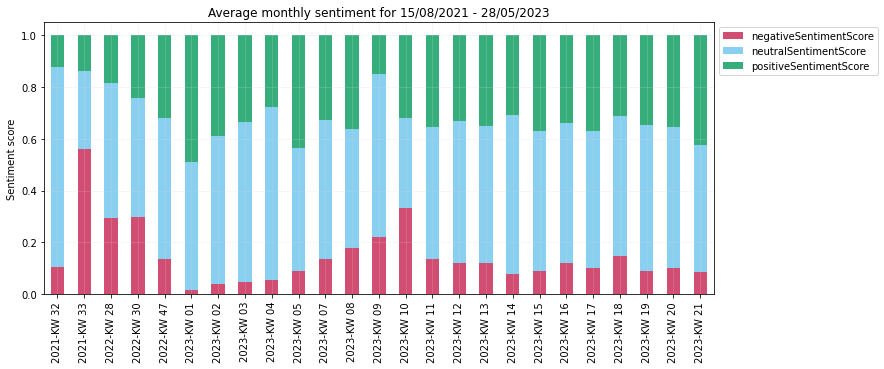

In [51]:
getTimeseriesSentimentBarGraph(df_comments_monthly)

New DS limits:  2021-08-09/2021-08-15


C:\Users\simon\AppData\Local\Temp\ipykernel_20212\2612951710.py:31: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df['created'].dt.strftime("%Y-KW%W")))


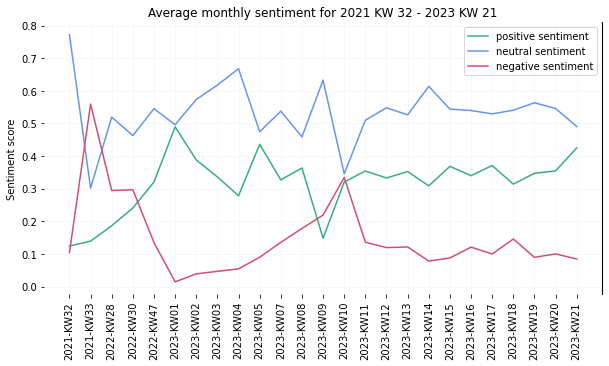

In [52]:
getTimeseriesSentimentGraph(df_comments_monthly)

In [59]:
df_comments_daily = df_comments.groupby(df_comments["created"].dt.to_period('D')).count()
df_comments_daily = df_comments_daily[["text"]]
df_comments_daily = df_comments_daily.reset_index()
#df_comments_daily = df_comments_daily.sort_values(by=['created'])
#df_comments_daily['created'] = pd.to_datetime(df_comments_daily.index)
df_comments_daily['created'] = pd.PeriodIndex(df_comments_daily['created'], freq='D').to_timestamp()
df_comments_daily

,created,text
0,2021-08-10,3
1,2021-08-11,28
2,2021-08-13,2
3,2021-08-16,1
4,2021-08-18,2
...,...,...
103,2023-05-20,671
104,2023-05-21,170
105,2023-05-22,412
106,2023-05-23,157


In [54]:
df_comments_daily_max = df_comments_daily.loc[df_comments_daily['text'].idxmax()]
df_comments_daily_max

created    2023-05-24
text             1298
Name: 107, dtype: object

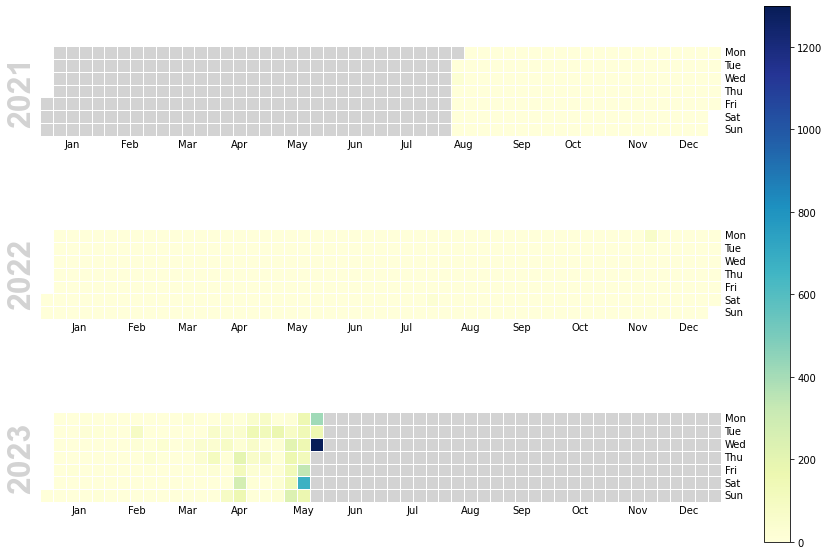

In [60]:
def plotCalendar(datafr, valueKey='text', colorscale='YlGnBu'):
    events = pd.Series(datafr[valueKey].to_list(), index=datafr['created'].to_list())

    fig,ax = calmap.calendarplot(events, fillcolor='lightgray', cmap=colorscale)
    fig.colorbar(ax[0].get_children()[1], ax=ax.ravel().tolist())
    fig.set_size_inches(14.5, 8.5)
plotCalendar(df_comments_daily)

In [68]:
df_comments_daily_sentiment = df_comments.groupby(df_comments["created"].dt.to_period('D')).mean().reset_index()
df_comments_daily_sentiment['created'] = pd.PeriodIndex(df_comments_daily_sentiment['created'], freq='D').to_timestamp()
df_comments_daily_sentiment

,created,Unnamed: 0,negativeSentimentScore,neutralSentimentScore,positiveSentimentScore
0,2021-08-10,3788.666667,0.014533,0.980133,0.005333
1,2021-08-11,3772.714286,0.118129,0.736293,0.145571
2,2021-08-13,3774.500000,0.039100,0.955050,0.005850
3,2021-08-16,3759.000000,0.022600,0.785000,0.192400
4,2021-08-18,3759.000000,0.827550,0.059900,0.112550
...,...,...,...,...,...
103,2023-05-20,5231.678092,0.095098,0.548501,0.356404
104,2023-05-21,4327.582353,0.112571,0.480248,0.407192
105,2023-05-22,2565.351942,0.101730,0.446358,0.451911
106,2023-05-23,3692.420382,0.097116,0.547395,0.355487


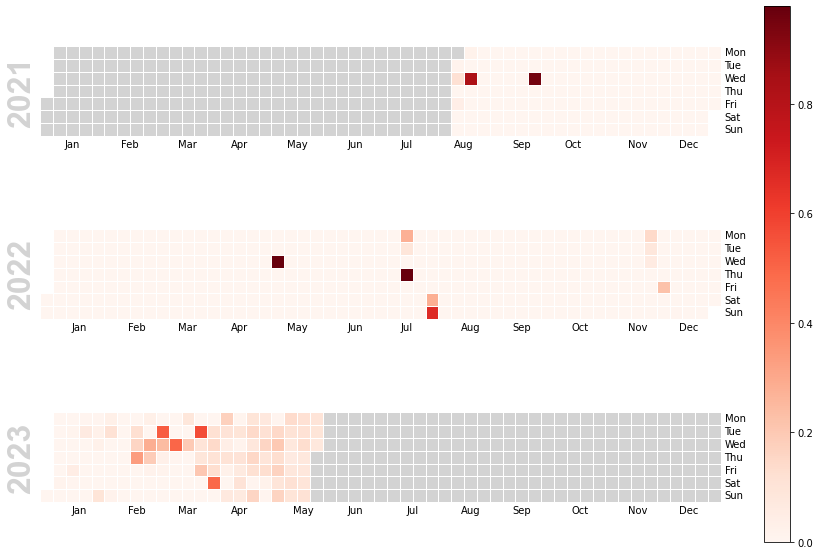

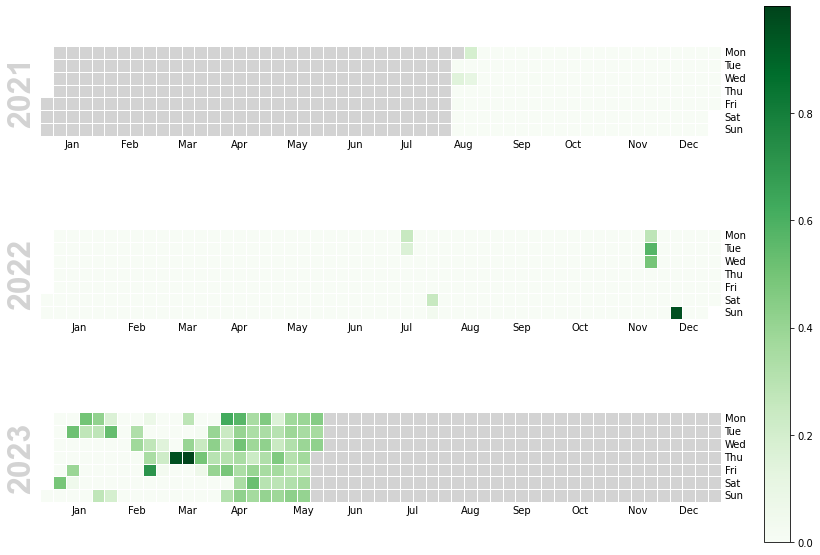

In [69]:
plotCalendar(df_comments_daily_sentiment, 'negativeSentimentScore', colorscale="Reds")

plotCalendar(df_comments_daily_sentiment, 'positiveSentimentScore', colorscale="Greens")